In [47]:
import pandas as pd
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt

style.use('ggplot')

transfers = pd.read_csv("~/Documents/datasets/transfers.csv")
transfers["Transfer_fee"] = transfers["Transfer_fee"] / 1000
transfers = transfers.drop("Market_value",axis=1)
league_from = {"League_from":{'Série A': 'Serie A'}}
transfers.replace(league_from, inplace=True)
#transfers.loc[(transfers['Team_from'] == 'Man Utd') & (transfers['Team_to'] == 'Real Madrid')]
to_madrid = transfers.loc[transfers['Team_to'] == 'Real Madrid']
to_barca = transfers.loc[transfers['Team_to'] == 'FC Barcelona']


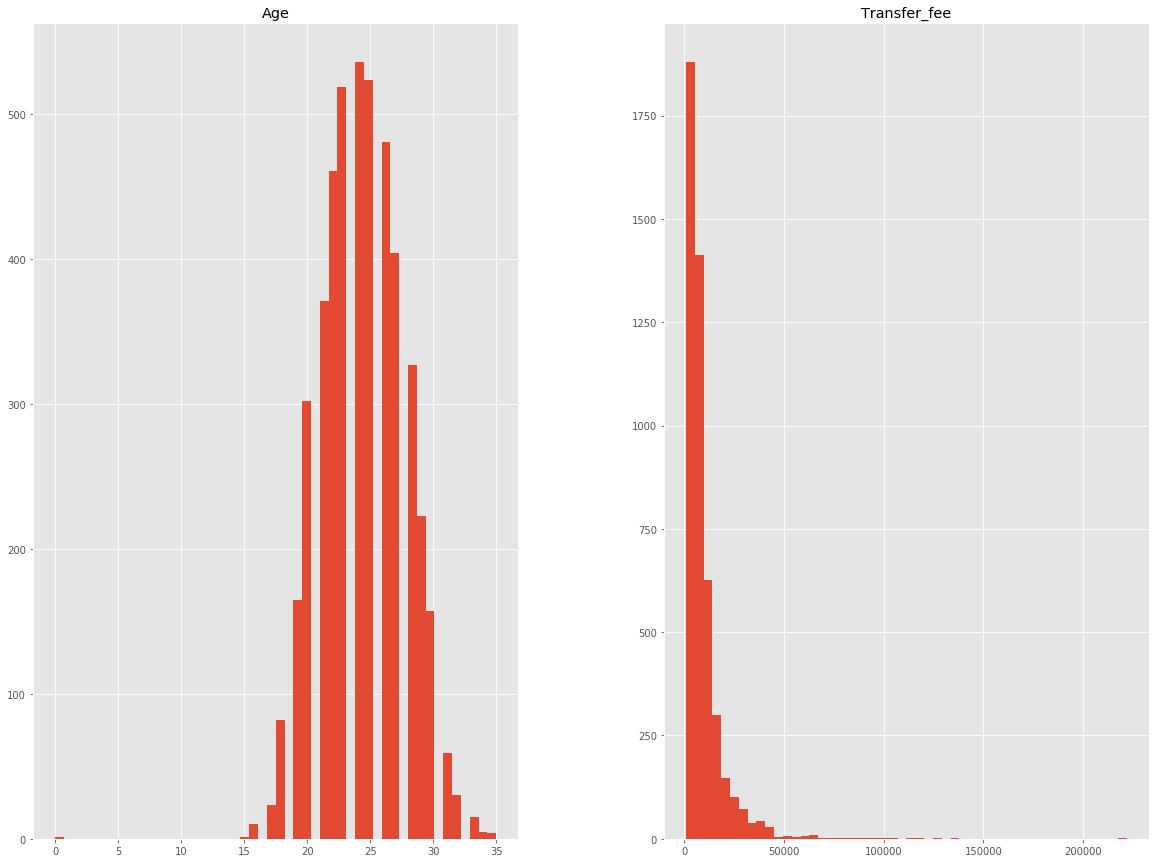

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
transfers.hist(bins=50,figsize=(20,15))
plt.show()

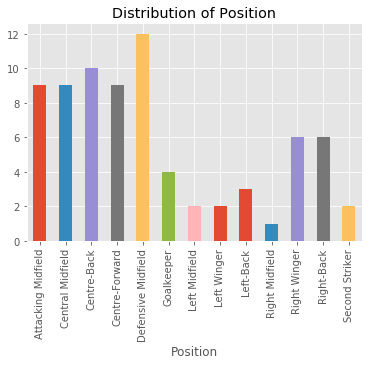

In [26]:
groupby_position = to_madrid.groupby('Position').size()
groupby_position.plot.bar(title = 'Distribution of Position')
plt.show()

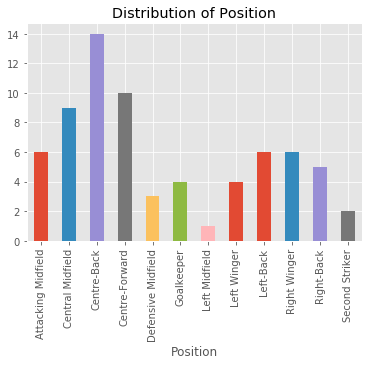

In [31]:
groupby_position = to_barca.groupby('Position').size()
groupby_position.plot.bar(title = 'Distribution of Position')
plt.show()

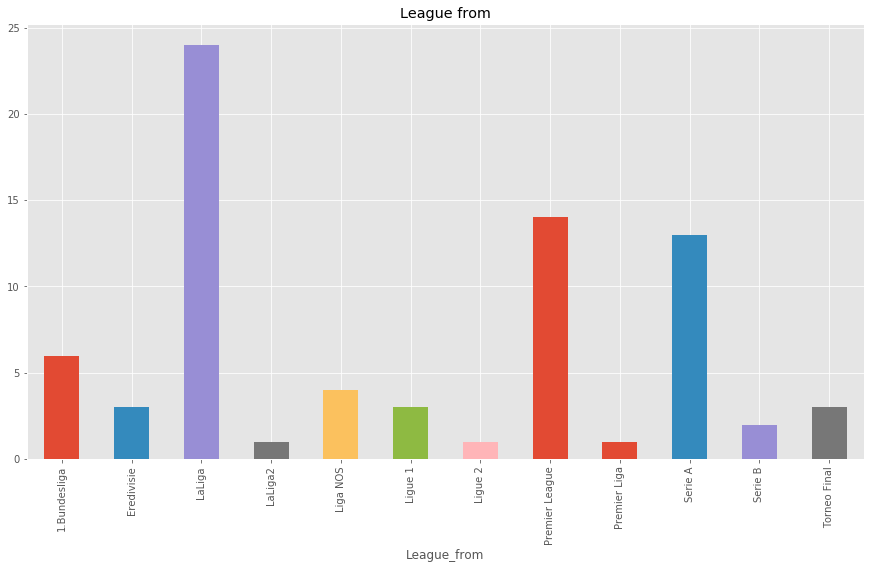

In [51]:

groupby_league_from = to_madrid.groupby('League_from').size()
groupby_league_from.plot.bar(title = 'League from',figsize=(15,8))
plt.show()

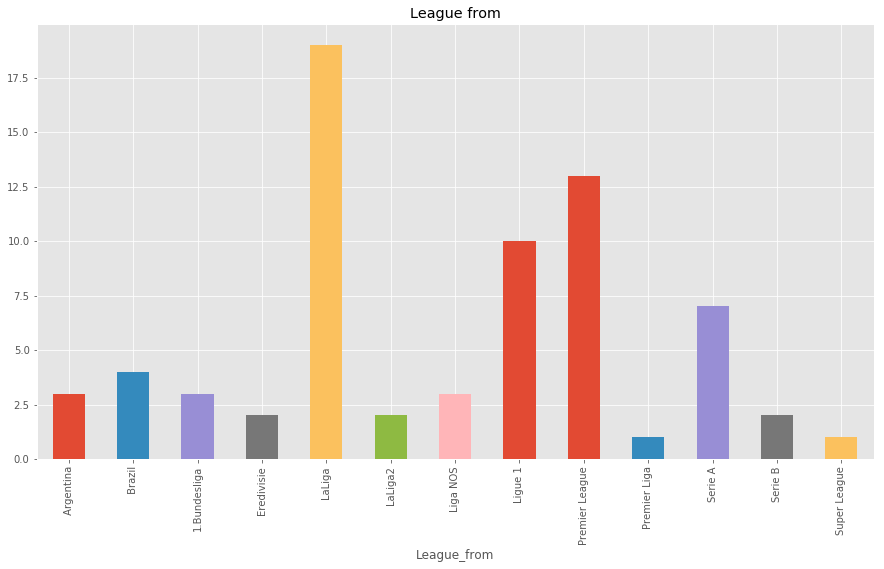

In [42]:

groupby_league_from = to_barca.groupby('League_from').size()
groupby_league_from.plot.bar(title = 'League from',figsize=(15,8))
plt.show()

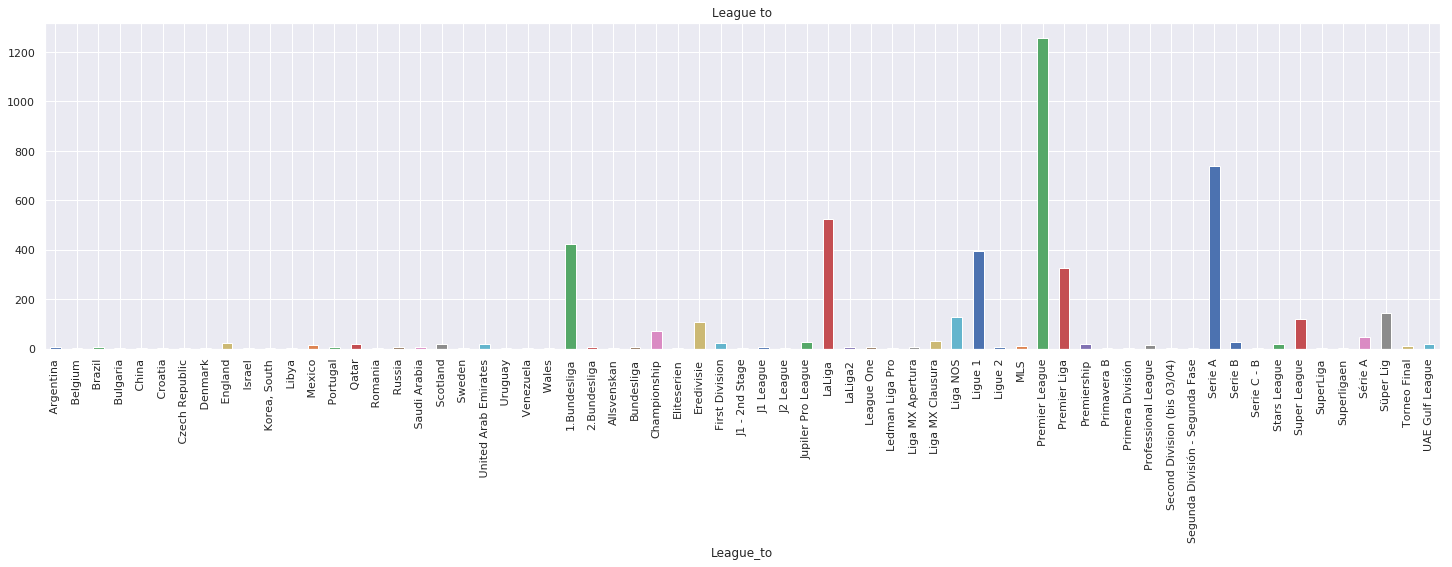

In [34]:

groupby_league_from = transfers.groupby('League_to').size()
groupby_league_from.plot.bar(title = 'League to',figsize=(25,6))

In [45]:
print(len(transfers))

4700


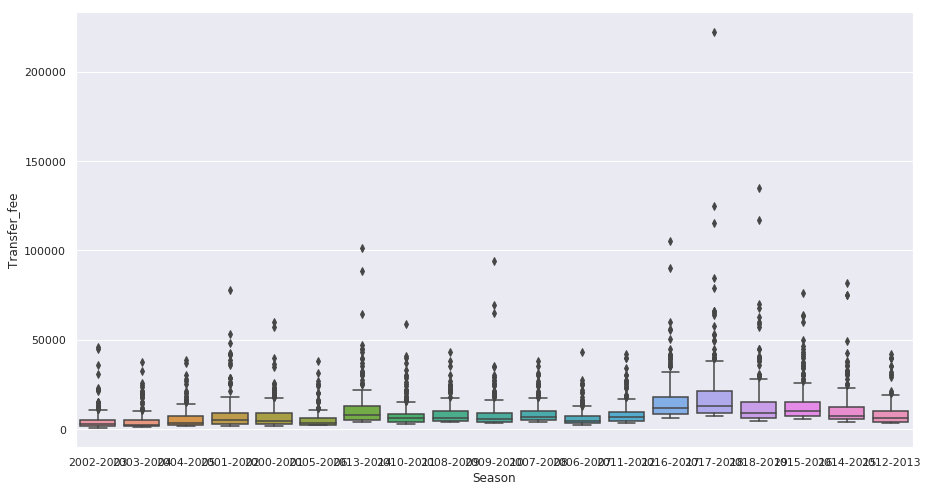

In [35]:
import seaborn as sns
# Set context to "paper"
plt.figure(figsize=(15,8))
#sns.set_context("paper" )
sns.set(style="darkgrid")
sns.boxplot(x="Season", y="Transfer_fee",data=transfers)

#sns.scatterplot('Age','Transfer_fee',data = transfers,hue='Position')

#show the plot
plt.show()


In [47]:
x = transfers["Transfer_fee"].sort_values(ascending=False)
x.head()

4211    222000000
4455    135000000
4212    125000000
4456    117000000
4213    115000000
Name: Transfer_fee, dtype: int64

In [37]:
transfers.Team_to.value_counts()
top_teams = ["Inter","Chelsea","Man City","Spurs","Juventus","Liverpool","AS Roma","Real Madrid","FC Barcelona","Atlético Madrid","AC Milan","Paris SG","Man Utd"]

In [46]:
top_transfers = transfers[transfers.Team_to.isin(top_teams)].sort_values(by="League_to")

In [49]:
top_transfers.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Transfer_fee
473,Christian Negouai,Defensive Midfield,23,RSC Charleroi,Jupiler Pro League,Man City,First Division,2001-2002,2250.0
333,Jon Macken,Centre-Forward,24,Preston NE,First Division,Man City,First Division,2001-2002,7500.0
368,Paulo Wanchope,Centre-Forward,24,West Ham,Premier League,Man City,First Division,2001-2002,5600.0
424,Jihai Sun,Centre-Back,24,DL Shide,China,Man City,First Division,2001-2002,3260.0
468,Lucién Mettomo,Centre-Back,24,Saint-Étienne,Ligue 2,Man City,First Division,2001-2002,2250.0


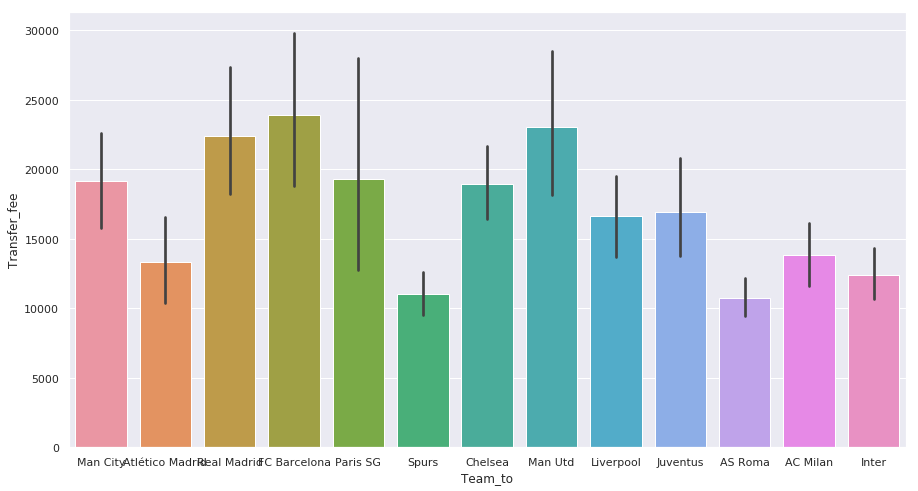

In [50]:
plt.figure(figsize=(15,8))
#sns.set_context("paper" )
sns.set(style="darkgrid")
sns.barplot(x="Team_to", y="Transfer_fee",data=top_transfers)

#sns.barplot('Age','Transfer_fee',data = top_transfers,hue='Position')

#show the plot
plt.show()


In [22]:
median = transfers['Transfer_fee'].median()
for i in transfers['Transfer_fee']:
    if i in transfers['Transfer_fee'] >= median:
        transfers['Price'] = 'High'
        
    else:
        transfers['Price'] = 'Low'
        
transfers[70:100]
transfers['Price'].head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [67]:
median

6500000.0

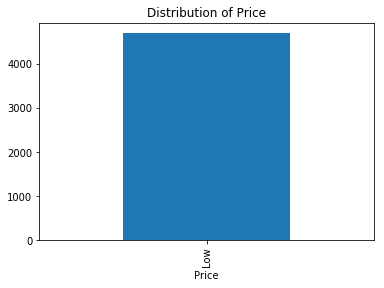

In [72]:
groupby_position = transfers.groupby('Price').size()
groupby_position.plot.bar(title = 'Distribution of Price')

In [119]:
subset = transfers[['Position', 'Age']].copy()


In [120]:
subset.head()

,Position,Age
561,Attacking Midfield,28
650,Central Midfield,23
910,Centre-Back,24
686,Centre-Back,26
604,Attacking Midfield,23


In [90]:
subset.describe()

,Age,Market_value,Transfer_fee,fee,fee_in_thousands
count,40.000000,1.0,4.000000e+01,40.000000,40.000000
mean,23.150000,5000000.0,2.630750e+06,2630.750000,2630.750000
std,3.683296,NaN,1.553764e+06,1553.763648,1553.763648
min,15.000000,5000000.0,9.000000e+05,900.000000,900.000000
25%,21.000000,5000000.0,1.500000e+06,1500.000000,1500.000000
50%,23.000000,5000000.0,2.275000e+06,2275.000000,2275.000000
75%,25.000000,5000000.0,3.037500e+06,3037.500000,3037.500000
max,32.000000,5000000.0,7.800000e+06,7800.000000,7800.000000


In [95]:
transfers.describe()

,Age,Market_value,Transfer_fee,fee,fee_in_thousands
count,4700.000000,3.440000e+03,4.700000e+03,4700.000000,4700.000000
mean,24.338723,8.622469e+06,9.447586e+06,9447.586170,9447.586170
std,3.230809,8.795181e+06,1.043772e+07,10437.719322,10437.719322
min,0.000000,5.000000e+04,8.250000e+05,825.000000,825.000000
25%,22.000000,3.500000e+06,4.000000e+06,4000.000000,4000.000000
50%,24.000000,6.000000e+06,6.500000e+06,6500.000000,6500.000000
75%,27.000000,1.000000e+07,1.082000e+07,10820.000000,10820.000000
max,35.000000,1.200000e+08,2.220000e+08,222000.000000,222000.000000


In [96]:
subset['Transfer_fee'].max()

7800000

In [97]:
transfers['Transfer_fee'].max()

222000000

In [225]:
import pandas as pd
fifa = pd.read_csv("/home/saazi/Documents/datasets/fifa18/CompleteDataset.csv")
fifa.shape

/home/saazi/ml/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(17981, 75)

In [55]:
fifa_subset = fifa[['Name', 'Age','Nationality','Overall','Value','Wage','Aggression','Acceleration','Agility','Balance','Dribbling','Finishing','Preferred Positions']].copy()


In [56]:
fifa_subset.head()

,Name,Age,Nationality,Overall,Value,Wage,Aggression,Acceleration,Agility,Balance,Dribbling,Finishing,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,€95.5M,€565K,63,89,89,63,91,94,ST LW
1,L. Messi,30,Argentina,93,€105M,€565K,48,92,90,95,97,95,RW
2,Neymar,25,Brazil,92,€123M,€280K,56,94,96,82,96,89,LW
3,L. Suárez,30,Uruguay,92,€97M,€510K,78,88,86,60,86,94,ST
4,M. Neuer,31,Germany,92,€61M,€230K,29,58,52,35,30,13,GK


In [57]:
fifa_subset.dtypes

Name                   object
Age                     int64
Nationality            object
Overall                 int64
Value                  object
Wage                   object
Aggression             object
Acceleration           object
Agility                object
Balance                object
Dribbling              object
Finishing              object
Preferred Positions    object
dtype: object

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Handling categorical attributes
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
df = fifa_subset.apply(encoder.fit_transform)
#data["Category"] = encoder.fit_transform(data["Category"].astype('str'))
crimes = df.drop("Preferred Positions", axis=1)

crime_cat = df["Preferred Positions"]



X_train, X_test, y_train ,y_test = train_test_split(crimes, crime_cat, random_state= 0)


#df.head()
forest = RandomForestClassifier(n_jobs=2,max_depth=1000,n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on the training subset: {:3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on the testing subset: {:3f}'.format(forest.score(X_test, y_test)))


Accuracy on the training subset: 0.999926
Accuracy on the testing subset: 0.415703


In [60]:
df.head()

,Name,Age,Nationality,Overall,Value,Wage,Aggression,Acceleration,Agility,Balance,Dribbling,Finishing,Preferred Positions
0,3162,16,121,48,202,93,78,150,138,62,189,185,780
1,9604,14,5,47,12,93,43,155,139,133,193,186,649
2,12387,9,18,46,20,53,58,158,145,114,192,181,427
3,9809,14,158,46,205,87,123,149,135,56,182,185,735
4,11114,15,58,46,167,41,19,56,48,22,22,3,279


In [62]:
obj_df = fifa_subset.select_dtypes(include=['object']).copy()

In [66]:
df = obj_df.apply(encoder.fit_transform)
#data["Category"] = encoder.fit_transform(data["Category"].astype('str'))
features = df.drop("Preferred Positions", axis=1)

labels = df["Preferred Positions"]



X_train, X_test, y_train ,y_test = train_test_split(features, labels, random_state= 42)


#df.head()
forest = RandomForestClassifier(n_jobs=-1,max_depth=100,n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on the training subset: {:3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on the testing subset: {:3f}'.format(forest.score(X_test, y_test)))


Accuracy on the training subset: 1.000000
Accuracy on the testing subset: 0.407696


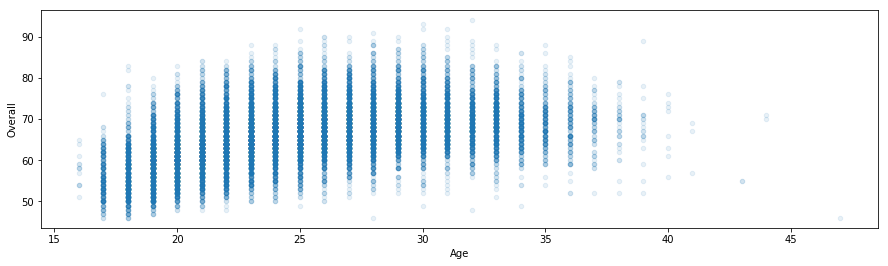

In [139]:
fifa_subset.plot(kind="scatter", x="Age", y="Overall", alpha=0.1,figsize=(15,4))

In [140]:
fifa_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 13 columns):
Name                   17981 non-null object
Age                    17981 non-null int64
Nationality            17981 non-null object
Overall                17981 non-null int64
Value                  17981 non-null object
Wage                   17981 non-null object
Aggression             17981 non-null object
Acceleration           17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Dribbling              17981 non-null object
Finishing              17981 non-null object
Preferred Positions    17981 non-null object
dtypes: int64(2), object(11)
memory usage: 1.8+ MB


In [71]:
olympics = pd.read_csv("~/Documents/datasets/olympics/athlete_events.csv")
olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [115]:
olympics = pd.read_csv("~/Documents/datasets/olympics/athlete_events.csv")
attributes = ["Sex","Age","Height","Weight","Team","Games","Sport","City","Year","Season","Medal"]
olympics_sum = olympics[attributes]
#olympics_sum.loc[:,"bmi"] = olympics["Weight"] / (olympics["Height"] / 100) ** 2
olympics_sum = olympics_sum.dropna(subset=["Medal"])
olympics.describe()
age_mean = olympics_sum["Age"].mean()
height_mean = olympics_sum["Height"].mean()
weight_mean = olympics_sum["Weight"].mean()
age_median = olympics_sum["Age"].median()
height_median = olympics_sum["Height"].median()
weight_median = olympics_sum["Weight"].median()
olympics_sum.Age = olympics_sum["Age"].fillna(age_mean)
olympics_sum.Height = olympics_sum["Height"].fillna(height_mean)
olympics_sum.Weight = olympics_sum["Weight"].fillna(weight_mean)
olympics_sum.head()

,Sex,Age,Height,Weight,Team,Games,Sport,City,Year,Season,Medal
3,M,34.0,177.554197,73.77068,Denmark/Sweden,1900 Summer,Tug-Of-War,Paris,1900,Summer,Gold
37,M,30.0,177.554197,73.77068,Finland,1920 Summer,Swimming,Antwerpen,1920,Summer,Bronze
38,M,30.0,177.554197,73.77068,Finland,1920 Summer,Swimming,Antwerpen,1920,Summer,Bronze
40,M,28.0,184.000000,85.00000,Finland,2014 Winter,Ice Hockey,Sochi,2014,Winter,Bronze
41,M,28.0,175.000000,64.00000,Finland,1948 Summer,Gymnastics,London,1948,Summer,Bronze


In [101]:
from sklearn.model_selection import train_test_split

# Handling categorical attributes
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
df = olympics_sum.apply(encoder.fit_transform)
#data["Category"] = encoder.fit_transform(data["Category"].astype('str'))
crimes = df.drop("Medal", axis=1)

crime_cat = df["Medal"]



X_train, X_test, y_train ,y_test = train_test_split(crimes, crime_cat, random_state= 0)


#df.head()
forest = RandomForestClassifier(n_jobs=-1,max_depth=100,n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on the training subset: {:3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on the testing subset: {:3f}'.format(forest.score(X_test, y_test)))


Accuracy on the training subset: 0.945604
Accuracy on the testing subset: 0.624472


In [175]:
y_train.describe()

count     29837
unique        3
top        Gold
freq      10001
Name: Medal, dtype: object

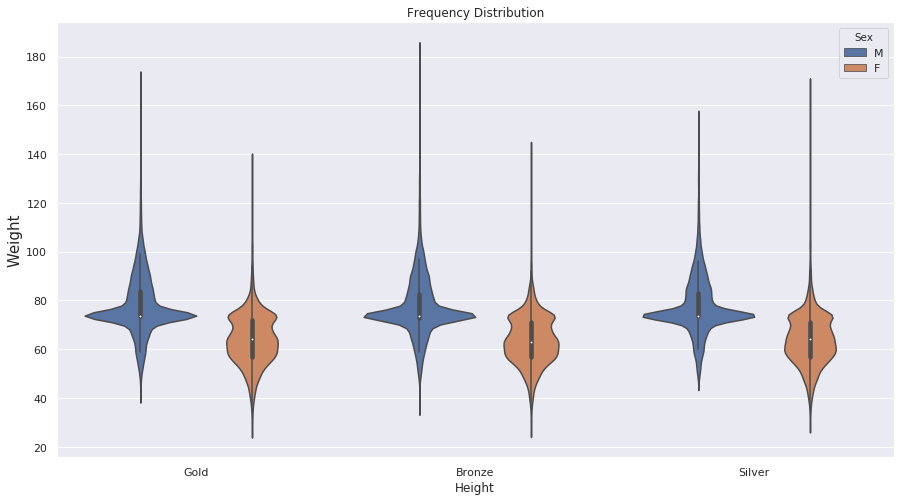

In [128]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

olympics = pd.read_csv("~/Documents/datasets/olympics/athlete_events.csv",nrows=50)
#olympics.describe()


# Set context to "paper"
plt.figure(figsize=(15,8))

sns.set(style="darkgrid")

#sns.scatterplot("Height", "Weight",hue= "Season",data = olympics_sum ,alpha=0.9)
sns.violinplot("Medal","Weight",hue= "Sex",data = olympics_sum )
plt.title('Frequency Distribution')
plt.ylabel('Weight',fontsize=15)
plt.xlabel('Height',fontsize=12)
plt.show()


In [116]:
corr_matrix = olympics_sum.corr()
corr_matrix["Height"].sort_values(ascending=False)

Height    1.000000
Weight    0.788569
Age       0.071064
Year      0.026368
Name: Height, dtype: float64

(Sex       0
 Age       0
 NOC       0
 Games     0
 Year      0
 Season    0
 City      0
 Sport     0
 Event     0
 Medal     0
 BMI       0
 dtype: int64, (100000, 11))

In [22]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

'''
Load some data and do some cleaning
'''
olympics = pd.read_csv("~/Documents/datasets/olympics/athlete_events.csv",nrows = 100000)
attributes = ["Sex","Age","Height","Weight","Team","Games","Sport","City","Year","Season","Medal"]
olympics.Medal = olympics["Medal"].fillna("Copper")
olympics.Age = olympics["Age"].fillna(olympics['Age'].mean())
olympics.Height = olympics["Height"].fillna(olympics['Height'].mean())
olympics.Weight = olympics["Weight"].fillna(olympics['Weight'].mean())

olympics['BMI'] = olympics["Weight"] / (olympics["Height"] ** 2)
olympics.drop(['ID','Name','Team',"Height","Weight"],1,inplace=True)
olympics.isnull().sum(0),olympics.shape

# custom multicolumn transformer

class MultiColumnLabelEncoder:
    def __init__(self, columns = None):
        self.columns = columns # array of column names to encode
        
    def fit(self, X,y=None):
        return self # not relevant
    def transform(self, X):
        ''' 
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all columns in X
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
             for colname,col in enumerate(output):
                output[colname] = LabelEncoder().fit_transform(col)
        
        return output
    
    def fit_transform(self, X ,y=None):
        return self.fit(X,y).transform(X)
    
### you can also use the above class as shown in the line below ###
#MultiColumnLabelEncoder(columns = cat_attributes).fit_transform(olympics)
                    
def column_types(df):
    cat_cols = []
    num_cols = []
    
    for y in df.columns:
        if (df[y].dtype == object):
            cat_cols.append(y)
        else:
            num_cols.append(y)
    
    return cat_cols, num_cols

# Handling categorical attributes
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

class MyLabelBinarizer():
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer( *args, **kwargs)
    def fit(self, x, y = 0):
        self.encoder.fit(x)
        return self
    def transform(self,x, y=0):
        return self.encoder.transform(x)

cat_attributes ,num_attributes = column_types(olympics)

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attributes)),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attributes)),
    ('label_encoder', MultiColumnLabelEncoder())
]) 

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

prepared = full_pipeline.fit_transform(olympics)

labels = olympics["Medal"]

X_train, X_test, y_train ,y_test = train_test_split(prepared, labels, random_state= 0)
forest = RandomForestClassifier(n_jobs=-1,max_depth=100,n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
label_rf = forest.predict(X_test)
print('Accuracy on the training subset: {:3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on the testing subset: {:3f}'.format(forest.score(X_test, y_test)))


Accuracy on the training subset: 0.977147
Accuracy on the testing subset: 0.903320


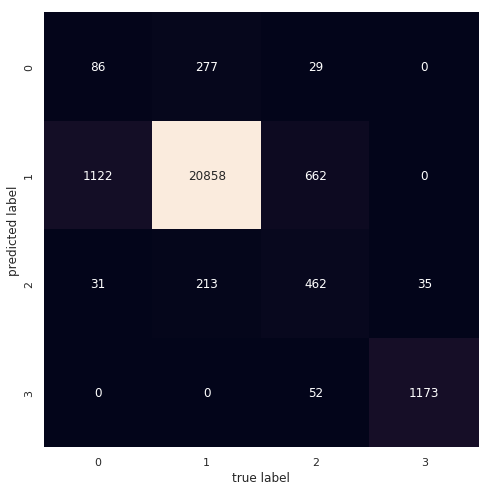

In [12]:
# Creating confusin matrix and heat map
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(y_test, label_rf)
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cbar=False)
           #, xticklabels=train.target_names
           #, yticklabels=train.target_names)

#Plotting heatmap of Confusion Matrix
plt.xlabel('true label')
plt.ylabel('predicted label');

In [13]:
some_data = olympics.iloc[40:55]
some_labels = labels.iloc[40:55]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", forest.predict(some_data_prepared)),some_labels

Predictions:	 ['Bronze' 'Copper' 'Gold' 'Copper' 'Gold' 'Copper' 'Copper' 'Copper'
 'Gold' 'Copper' 'Copper' 'Copper' 'Copper' 'Copper' 'Copper']


(None, 40    Bronze
 41    Bronze
 42      Gold
 43    Copper
 44      Gold
 45    Copper
 46    Copper
 47    Copper
 48      Gold
 49    Copper
 50    Bronze
 51    Copper
 52    Copper
 53    Copper
 54    Copper
 Name: Medal, dtype: object)

In [15]:
from sklearn.linear_model import LogisticRegression
lin_reg = LogisticRegression(solver='lbfgs',max_iter=300,multi_class='multinomial',random_state=0)
lin_reg.fit(X_train, y_train)
label_log = lin_reg.predict(X_test)
print('Accuracy on the training subset: {:3f}'.format(lin_reg.score(X_train, y_train)))
print('Accuracy on the testing subset: {:3f}'.format(lin_reg.score(X_test, y_test)))


Accuracy on the training subset: 0.901893
Accuracy on the testing subset: 0.899480


/home/saazi/ml/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


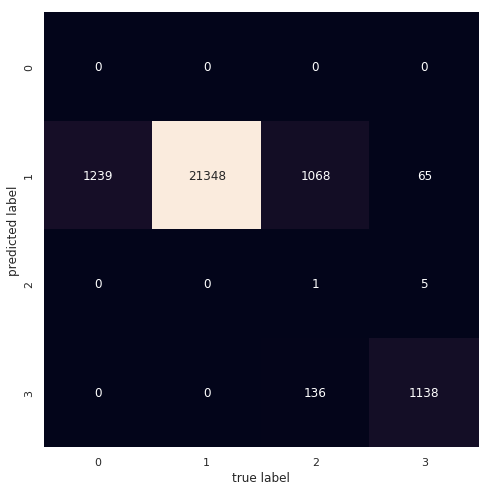

In [16]:
# Creating confusin matrix and heat map
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(y_test, label_log)
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cbar=False)
           #, xticklabels=train.target_names
           #, yticklabels=train.target_names)

#Plotting heatmap of Confusion Matrix
plt.xlabel('true label')
plt.ylabel('predicted label');

In [17]:
#Naive bayes doesnt require scaling of the data and performs as good as logistic regression
from sklearn.naive_bayes import MultinomialNB

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attributes)),
   # ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attributes)),
    ('label_binarizer', MultiColumnLabelEncoder())
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

prepared = full_pipeline.fit_transform(olympics)
#prepared

#data["Category"] = encoder.fit_transform(data["Category"].astype('str'))
#features = df.drop(["Medal"], axis=1)

labels = olympics["Medal"]



X_train, X_test, y_train ,y_test = train_test_split(prepared, labels, random_state= 0)



nbm = MultinomialNB()
nbm.fit(X_train, y_train)
label = nbm.predict(X_test)

print('Accuracy on the training subset: {:3f}'.format(nbm.score(X_train, y_train)))
print('Accuracy on the testing subset: {:3f}'.format(nbm.score(X_test, y_test)))


Accuracy on the training subset: 0.865280
Accuracy on the testing subset: 0.861000


In [18]:
#Naive bayes doesnt require scaling of the data and performs as good as logistic regression
from sklearn.naive_bayes import GaussianNB

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attributes)),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attributes)),
    ('label_binarizer', MultiColumnLabelEncoder())
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

prepared = full_pipeline.fit_transform(olympics)
#prepared

#data["Category"] = encoder.fit_transform(data["Category"].astype('str'))
#features = df.drop(["Medal"], axis=1)

labels = olympics["Medal"]



X_train, X_test, y_train ,y_test = train_test_split(prepared, labels, random_state= 0)



nb = GaussianNB()
nb.fit(X_train, y_train)

print('Accuracy on the training subset: {:3f}'.format(nb.score(X_train, y_train)))
print('Accuracy on the testing subset: {:3f}'.format(nb.score(X_test, y_test)))


Accuracy on the training subset: 0.891413
Accuracy on the testing subset: 0.888320


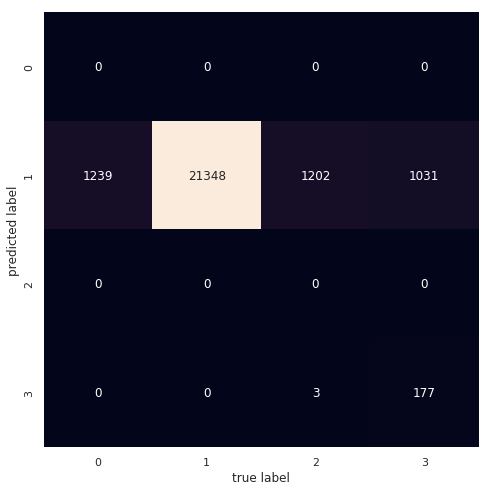

In [19]:
# Creating confusin matrix and heat map
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(y_test, label)
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cbar=False)
           #, xticklabels=train.target_names
           #, yticklabels=train.target_names)

#Plotting heatmap of Confusion Matrix
plt.xlabel('true label')
plt.ylabel('predicted label');

In [212]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

cat_attributes = ["Sex","NOC","Games","Sport","City","Season","Event","Medal"]
features = olympics.drop(cat_attributes, axis=1)

labels = olympics["Medal"]

X_train, X_test, y_train ,y_test = train_test_split(features, labels, random_state= 0)

pipe = Pipeline([("scaler", MinMaxScaler()), ("forest", RandomForestClassifier(n_jobs=-1,
                                                        max_depth=100,n_estimators=100,
                                                       random_state=0))])

pipe.fit(X_train, y_train)
print('Accuracy on the training subset: {:3f}'.format(pipe.score(X_train, y_train)))
print('Accuracy on the testing subset: {:3f}'.format(pipe.score(X_test, y_test)))


/home/saazi/ml/env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Accuracy on the training subset: 0.930280
Accuracy on the testing subset: 0.817600


In [224]:
# custom multicolumn transformer
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self, columns = None):
        self.columns = columns # array of column names to encode
        
    def fit(self, X,y=None):
        return self # not relevant
    def transform(self, X):
        ''' 
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all columns in X
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
             for colname,col in enumerate(output):
                output[colname] = LabelEncoder().fit_transform(col)
        
        return output
    
    def fit_transform(self, X ,y=None):
        return self.fit(X,y).transform(X)
    

olympics_cleaned = MultiColumnLabelEncoder(columns = cat_attributes).fit_transform(olympics).head()

olympics_cleaned.head()
        

,Sex,Age,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI
0,1,24.0,41,37,1992,0,5,7,155,1,0.002469
1,1,23.0,41,48,2012,0,17,31,392,1,0.002076
2,1,24.0,55,6,1920,0,2,23,343,1,0.002301
3,1,34.0,55,1,1900,0,26,60,703,2,0.002301
4,0,21.0,145,36,1988,1,8,52,617,1,0.002396


In [4]:
cat = olympics.iloc[:,: ].select_dtypes(include=['object'])
#olympics.head()
cat

,Sex,NOC,Games,Season,City,Sport,Event,Medal
0,M,CHN,1992 Summer,Summer,Barcelona,Basketball,Basketball Men's Basketball,Copper
1,M,CHN,2012 Summer,Summer,London,Judo,Judo Men's Extra-Lightweight,Copper
2,M,DEN,1920 Summer,Summer,Antwerpen,Football,Football Men's Football,Copper
3,M,DEN,1900 Summer,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,F,NED,1988 Winter,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Copper
5,F,NED,1988 Winter,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",Copper
6,F,NED,1992 Winter,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,Copper
7,F,NED,1992 Winter,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",Copper
8,F,NED,1994 Winter,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,Copper
9,F,NED,1994 Winter,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",Copper


In [5]:
olympics.dtypes

Sex        object
Age       float64
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
BMI       float64
dtype: object

In [8]:
#cat = olympics.iloc[:,: ].select_dtypes(include=['object'])

def column_types(df):
    cat_cols = []
    num_cols = []
    
    for y in df.columns:
        if (df[y].dtype == object):
            cat_cols.append(y)
        else:
            num_cols.append(y)
    
    return cat_cols, num_cols

cat ,num = column_types(olympics)
    

In [10]:
num

['Age', 'Year', 'BMI']

In [15]:
import pandas as pd
games = pd.read_json('~/Documents/datasets/games.json')

In [2]:
games.head()

,AC,AF,AHW,AO,AR,AS,AST,AY,Attendance,AwayTeam,...,HO,HR,HS,HST,HTAG,HTHG,HY,HomeTeam,Referee,Years
0,6,12,1,6,0,8,4,2,20043,Man City,...,8,0,17,14,0,2,1,Charlton,Rob Harris,00-01
1,7,14,0,3,0,12,5,2,34914,West Ham,...,2,0,17,10,0,1,1,Chelsea,Graham Barber,00-01
2,4,21,1,3,0,16,9,3,20624,Middlesbrough,...,1,1,6,3,1,1,5,Coventry,Barry Knight,00-01
3,8,13,0,2,0,13,6,1,27223,Southampton,...,0,0,6,4,2,1,1,Derby,Andy D'Urso,00-01
4,4,20,0,1,0,12,6,3,40010,Everton,...,6,0,17,8,0,2,1,Leeds,Dermot Gallagher,00-01


In [12]:
games.dtypes

AC            object
AF            object
AHW           object
AO            object
AR            object
AS            object
AST           object
AY            object
Attendance    object
AwayTeam      object
Date          object
Div           object
FTAG          object
FTHG          object
HC            object
HF            object
HHW           object
HO            object
HR            object
HS            object
HST           object
HTAG          object
HTHG          object
HY            object
HomeTeam      object
Referee       object
Years         object
dtype: object

In [16]:
import pandas.io.data as web

ModuleNotFoundError: No module named 'pandas.io.data'